<a href="https://colab.research.google.com/github/DLCBA/Chronos/blob/main/Cnn_Gan_Adidas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implementar una solución con Redes Neuronales Convolucionales (CNN) para datos de ventas puede ser un enfoque interesante, aunque las CNN se utilizan comúnmente para procesamiento de imágenes. Sin embargo, pueden adaptarse a problemas de series temporales o datos secuenciales, como las ventas a lo largo del tiempo.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# Carga del set de datos
url = 'https://github.com/DLCBA/Chronos/raw/d38f70a5c42a0468042cfcf9cf71d244bc986fd4/Adidas%20US%20Sales%20Datasetsfinalpycaret.xlsx'
df = pd.read_excel(url)


In [ ]:
# Verificamos la estructura del set de datos
df.head()

,Fecha Factura,Precio Unitario,Unidades Vendidas,Ventas Totales
0,2020-01-01,50,1200,60000
1,2020-01-01,75,275,20625
2,2020-01-01,47,336,15792
3,2020-01-01,68,83,5644
4,2020-01-01,34,384,13056


In [ ]:
# Muestra información detallada sobre el DataFrame, incluidos los tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Fecha Factura      9648 non-null   datetime64[ns]
 1   Precio Unitario    9648 non-null   int64         
 2   Unidades Vendidas  9648 non-null   int64         
 3   Ventas Totales     9648 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 301.6 KB


In [ ]:
# Eliminar las columnas 'Precio Unitario' y 'Unidades Vendidas'
df = df.drop(['Precio Unitario', 'Unidades Vendidas'], axis=1)

# Cambiar el nombre de la columna 'Fecha Factura' a 'Fecha'
df = df.rename(columns={'Fecha Factura': 'Fecha'})

In [ ]:
# Función para crear secuencias adecuadas
def create_sequences(data, window_size):
    sequences = []
    labels = []
    for i in range(len(data) - window_size):
        seq = data[i:i + window_size]
        label = data[i + window_size]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)


window_size = 30  # Tamaño de la ventana
sales_data = df['Ventas Totales'].values  # Ajuste a la columna 'Ventas Totales'
sequences, labels = create_sequences(sales_data, window_size)

# Mostrar las dimensiones de las secuencias y etiquetas para verificar
print(sequences.shape)
print(labels.shape)

(9618, 30)
(9618,)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(window_size, 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')


Formateamos las secuencias para que tengan la forma esperada por la CNN ([samples, time steps, features]).


In [ ]:
# Reshape de datos para CNN
sequences = sequences.reshape((sequences.shape[0], sequences.shape[1], 1))


In [ ]:
# Entrenaiento del modelo. split 80/20
from sklearn.model_selection import train_test_split

# Dividir datos en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(sequences, labels, test_size=0.2, random_state=42)

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))


Epoch 1/20
241/241 [==============================] - 2s 4ms/step - loss: 132088000.0000 - val_loss: 114064168.0000
Epoch 2/20
241/241 [==============================] - 1s 3ms/step - loss: 117203648.0000 - val_loss: 107427744.0000
Epoch 3/20
241/241 [==============================] - 1s 5ms/step - loss: 111246328.0000 - val_loss: 103584960.0000
Epoch 4/20
241/241 [==============================] - 1s 6ms/step - loss: 108929408.0000 - val_loss: 101866552.0000
Epoch 5/20
241/241 [==============================] - 1s 5ms/step - loss: 106493352.0000 - val_loss: 100463600.0000
Epoch 6/20
241/241 [==============================] - 1s 3ms/step - loss: 104076912.0000 - val_loss: 100269904.0000
Epoch 7/20
241/241 [==============================] - 1s 3ms/step - loss: 102521776.0000 - val_loss: 102209160.0000
Epoch 8/20
241/241 [==============================] - 1s 3ms/step - loss: 99422680.0000 - val_loss: 96544184.0000
Epoch 9/20
241/241 [==============================] - 1s 3ms/step - loss: 

In [ ]:
# Evaluar el modelo en el conjunto de validación
val_loss = model.evaluate(X_val, y_val)
print(f'Validation Loss: {val_loss}')

61/61 [==============================] - 0s 2ms/step - loss: 98930528.0000
Validation Loss: 98930528.0


Mejoramiento de la CNN

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Función para crear secuencias
def create_sequences(data, window_size):
    sequences = []
    labels = []
    for i in range(len(data) - window_size):
        seq = data[i:i + window_size]
        label = data[i + window_size]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

In [ ]:
# Tamaño de la ventana
window_size = 30  # Tamaño de la ventana
sales_data = df['Ventas Totales'].values  # Ajuste a la columna 'Ventas Totales'

In [ ]:
# Normalización
scaler = MinMaxScaler()
sales_data_scaled = scaler.fit_transform(sales_data.reshape(-1, 1))

sequences, labels = create_sequences(sales_data_scaled, window_size)
sequences = sequences.reshape((sequences.shape[0], sequences.shape[1], 1))

In [ ]:
# Dividir datos en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(sequences, labels, test_size=0.2, random_state=42)


In [ ]:
# Construcción del modelo CNN mejorado
model = Sequential([
    Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(window_size, 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),
    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.2),
    Dense(1)
])


In [ ]:
# Compilar el modelo con una tasa de aprendizaje ajustada
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse')


In [ ]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))


Epoch 1/50
241/241 [==============================] - 6s 19ms/step - loss: 0.0184 - val_loss: 0.0175
Epoch 2/50
241/241 [==============================] - 2s 9ms/step - loss: 0.0168 - val_loss: 0.0139
Epoch 3/50
241/241 [==============================] - 2s 8ms/step - loss: 0.0156 - val_loss: 0.0146
Epoch 4/50
241/241 [==============================] - 2s 8ms/step - loss: 0.0150 - val_loss: 0.0125
Epoch 5/50
241/241 [==============================] - 3s 11ms/step - loss: 0.0145 - val_loss: 0.0125
Epoch 6/50
241/241 [==============================] - 2s 8ms/step - loss: 0.0138 - val_loss: 0.0118
Epoch 7/50
241/241 [==============================] - 3s 13ms/step - loss: 0.0134 - val_loss: 0.0120
Epoch 8/50
241/241 [==============================] - 2s 9ms/step - loss: 0.0134 - val_loss: 0.0114
Epoch 9/50
241/241 [==============================] - 2s 8ms/step - loss: 0.0131 - val_loss: 0.0111
Epoch 10/50
241/241 [==============================] - 2s 8ms/step - loss: 0.0130 - val_loss: 0.0

In [ ]:
# Evaluar el modelo en el conjunto de validación
val_loss = model.evaluate(X_val, y_val)
print(f'Validation Loss: {val_loss}')

61/61 [==============================] - 0s 3ms/step - loss: 0.0098
Validation Loss: 0.009800220839679241


Análisis de Predicciones

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [ ]:
# Dividir datos en entrenamiento, validación y prueba
X_train, X_temp, y_train, y_temp = train_test_split(sequences, labels, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
# Evaluar el modelo en el conjunto de prueba
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

61/61 [==============================] - 0s 2ms/step - loss: 0.0091
Test Loss: 0.009135179221630096


In [ ]:
# Hacer predicciones en el conjunto de prueba
y_test_pred = model.predict(X_test)
y_test_pred = scaler.inverse_transform(y_test_pred)
y_test_true = scaler.inverse_transform(y_test.reshape(-1, 1))

61/61 [==============================] - 0s 3ms/step


In [ ]:
# Evaluación adicional
mae = mean_absolute_error(y_test_true, y_test_pred)
mape = mean_absolute_percentage_error(y_test_true, y_test_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')

Mean Absolute Error (MAE): 4698.160125129684
Mean Absolute Percentage Error (MAPE): 9450166430460598.0


In [ ]:
from sklearn.metrics import r2_score

In [ ]:
# Calcular R^2 para el conjunto de prueba
r2_test = r2_score(y_test_true, y_test_pred)
print(f'R^2 on Test Data: {r2_test}')

R^2 on Test Data: 0.6066910293437121


In [ ]:
# Hacer predicciones en el conjunto de validación
y_val_pred = model.predict(X_val)
y_val_pred = scaler.inverse_transform(y_val_pred)
y_val_true = scaler.inverse_transform(y_val.reshape(-1, 1))

61/61 [==============================] - 0s 2ms/step


In [ ]:
# Calcular R^2 para el conjunto de validación
r2_val = r2_score(y_val_true, y_val_pred)
print(f'R^2 on Validation Data: {r2_val}')

R^2 on Validation Data: 0.6669299346563589


Mejoró bastante el desempeño cuando se aplicó una CNN mejorada con mejores hiperparametros, Dropout  Learning Rate, aunque sigue siendo mejor el desempeño con modelos de regresión.

**Aplicación de modelos GAN**

Las GAN son una clase de redes neuronales que se componen de dos modelos: un generador y un discriminador. En el contexto de series temporales como las ventas, las GAN pueden ser utilizadas para generar secuencias de datos similares a las observadas en el conjunto de entrenamiento.

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Reshape, Flatten, LeakyReLU
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Tamaño de la ventana
window_size = 30  # Tamaño de la ventana
sales_data = df['Ventas Totales'].values

In [ ]:
# Normalización
scaler = MinMaxScaler()
sales_data_scaled = scaler.fit_transform(sales_data.reshape(-1, 1))

In [ ]:
# Crear secuencias a partir de los datos de ventas
def create_sequences(data, window_size):
    sequences = []
    for i in range(len(data) - window_size):
        seq = data[i:i + window_size]
        sequences.append(seq)
    return np.array(sequences)
sequences = create_sequences(sales_data_scaled, window_size)

In [ ]:
from tensorflow.keras.optimizers import legacy as optimizers_legacy

In [ ]:
# Parámetros de la GAN
latent_dim = 100
adam = optimizers_legacy.Adam(learning_rate=0.0002, beta_1=0.5)

In [ ]:
# Generador
def build_generator(latent_dim, window_size):
    model = Sequential()
    model.add(Dense(128, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(window_size))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(window_size, activation='tanh'))
    return model


In [ ]:
# Discriminador
def build_discriminator(window_size):
    model = Sequential()
    model.add(Dense(128, input_shape=(window_size,)))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [ ]:
# Construcción del modelo GAN
generator = build_generator(latent_dim, window_size)
discriminator = build_discriminator(window_size)
discriminator.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
z = Input(shape=(latent_dim,))
generated_seq = generator(z)
discriminator.trainable = False
validity = discriminator(generated_seq)

In [ ]:
gan = Model(z, validity)
gan.compile(optimizer=adam, loss='binary_crossentropy')

In [ ]:
# Entrenamiento de la GAN
def train_gan(epochs, batch_size, window_size):
    half_batch = int(batch_size / 2)

    for epoch in range(epochs):
        # Entrenar el discriminador
        idx = np.random.randint(0, sequences.shape[0], half_batch)
        real_seqs = sequences[idx]

        noise = np.random.normal(0, 1, (half_batch, latent_dim))
        gen_seqs = generator.predict(noise)

        d_loss_real = discriminator.train_on_batch(real_seqs, np.ones((half_batch, 1)))
        d_loss_fake = discriminator.train_on_batch(gen_seqs, np.zeros((half_batch, 1)))
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Entrenar el generador
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        valid_y = np.array([1] * batch_size)
        g_loss = gan.train_on_batch(noise, valid_y)

        if epoch % 100 == 0:
            print(f"{epoch} [D loss: {d_loss[0]} | D accuracy: {100 * d_loss[1]}] [G loss: {g_loss}]")

In [ ]:
# Parámetros de entrenamiento
epochs = 500
batch_size = 64

train_gan(epochs, batch_size, window_size)

1/1 [==============================] - 0s 20ms/step
0 [D loss: 0.6898613274097443 | D accuracy: 62.5] [G loss: 0.6987556219100952]
1/1 [==============================] - 0s 22ms/step
100 [D loss: 0.6951324045658112 | D accuracy: 35.9375] [G loss: 0.6951549053192139]
1/1 [==============================] - 0s 27ms/step
200 [D loss: 0.69744011759758 | D accuracy: 46.875] [G loss: 0.6994016766548157]
1/1 [==============================] - 0s 25ms/step
300 [D loss: 0.692439466714859 | D accuracy: 59.375] [G loss: 0.7077188491821289]
1/1 [==============================] - 0s 26ms/step
400 [D loss: 0.690830647945404 | D accuracy: 57.8125] [G loss: 0.6965866088867188]
1/1 [==============================] - 0s 25ms/step


In [ ]:
# Generar nuevas secuencias
noise = np.random.normal(0, 1, (10, latent_dim))
generated_seqs = generator.predict(noise)
generated_seqs = scaler.inverse_transform(generated_seqs)


1/1 [==============================] - 0s 352ms/step


In [ ]:
import matplotlib.pyplot as plt

**Predicciones para los próximos 30 días de la red GAN**

Cada secuencia generada representa una predicción para los próximos 30 días, basada en la información de ventas históricas y el patrón capturado por el modelo de GAN.
Permite obtener una idea de cómo podrían comportarse las ventas en el futuro, según el modelo entrenado.



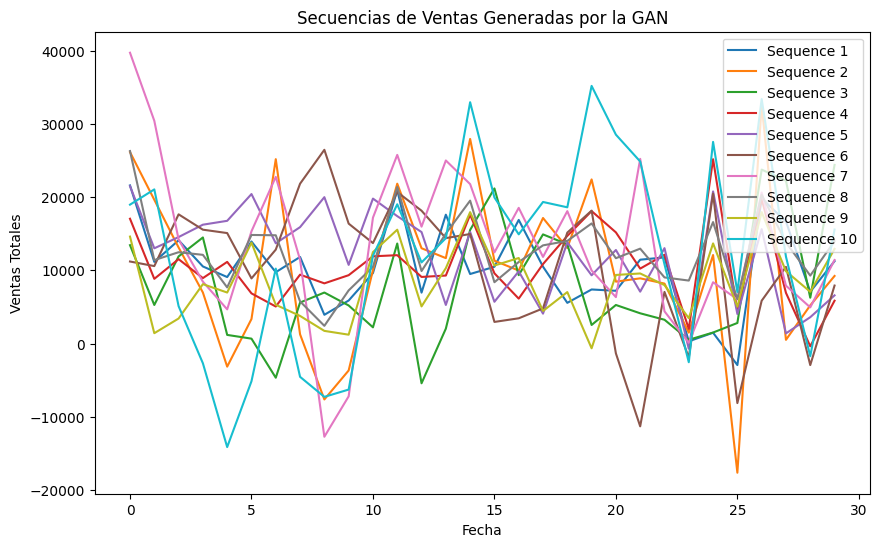

In [ ]:
# Visualizar secuencias generadas
plt.figure(figsize=(10, 6))
for i, seq in enumerate(generated_seqs):
    plt.plot(seq, label=f'Sequence {i+1}')
plt.title('Secuencias de Ventas Generadas por la GAN')
plt.xlabel('Fecha')
plt.ylabel('Ventas Totales')
plt.legend()
plt.show()

Presentamos la implementación de dos técnicas de aprendizaje automático, Redes Neuronales Convolucionales (CNN) y Redes Generativas Adversarias (GAN), para predecir ventas en un contexto comercial. El objetivo principal es utilizar modelos de aprendizaje automático para generar predicciones de ventas futuras basadas en datos históricos.

**CNN para Predicciones de Ventas**
La Red Neuronal Convolucional (CNN) es una arquitectura de red neuronal especialmente diseñada para procesar datos estructurados como imágenes, pero también puede ser adaptada para trabajar con secuencias temporales, como series de tiempo de ventas. En este caso, se implementa una CNN para predecir las ventas futuras utilizando datos históricos.

**Preprocesamiento de Datos:**   Se realiza un preprocesamiento de los datos históricos de ventas, que incluye normalización de datos y creación de secuencias de tiempo.

**Arquitectura de la CNN:** La CNN se diseña con capas convolucionales y de agrupamiento para aprender características temporales importantes de los datos de ventas.

**Entrenamiento del Modelo:** Se entrena la CNN utilizando datos históricos de ventas, ajustando los parámetros del modelo para minimizar la pérdida y mejorar la precisión de las predicciones.

**Evaluación del Modelo:** Se evalúa el rendimiento del modelo utilizando métricas como error cuadrático medio (MSE) o coeficiente de determinación (R2) en un conjunto de datos de validación.

**GAN para Predicciones de Ventas**
Las Redes Generativas Adversarias (GAN) son un tipo de arquitectura de redes neuronales que consisten en dos modelos, un generador y un discriminador, que compiten entre sí para mejorar la calidad de las muestras generadas. En este caso, se utiliza una GAN para generar secuencias de ventas sintéticas basadas en datos históricos.

**Preprocesamiento de Datos:**  Se realiza un preprocesamiento similar al utilizado en la CNN para preparar los datos históricos de ventas.

**Arquitectura de la GAN:** La GAN se compone de un generador y un discriminador. El generador crea secuencias de ventas sintéticas basadas en ruido aleatorio, mientras que el discriminador evalúa la autenticidad de las muestras generadas.

**Entrenamiento del Modelo:** Se entrena la GAN utilizando datos históricos de ventas. Durante el entrenamiento, el generador mejora la calidad de las muestras generadas mientras el discriminador aprende a distinguir entre muestras reales y sintéticas.

**Generación de Predicciones:** Una vez que la GAN está entrenada, se puede utilizar el generador para generar secuencias de ventas sintéticas para un período futuro específico.

**Conclusiones**
La implementación de CNN y GAN para predecir ventas ofrece una forma innovadora de utilizar técnicas de aprendizaje automático para análisis y predicción de series temporales.
La CNN permite modelar patrones temporales complejos en los datos de ventas históricos, mientras que la GAN ofrece la capacidad de generar secuencias de ventas sintéticas para períodos futuros.
